In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\cell_samples.csv")
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [56]:
print(df.shape)
print("\n")
print(df.size)# Data size ocupide in meomery in byte
print("\n")
print(df.count())

(699, 11)


7689


ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64


<Axes: xlabel='Clump', ylabel='UnifSize'>

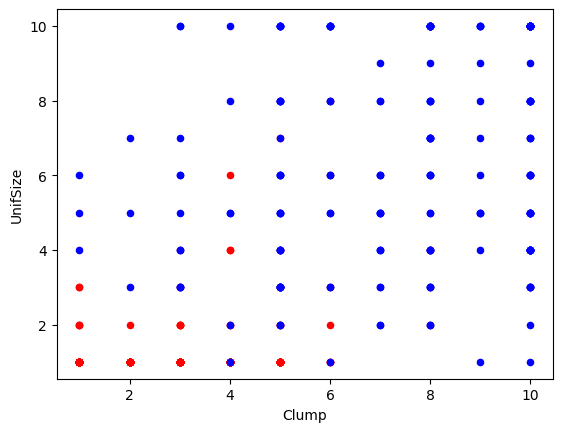

In [57]:
maligent_df = df[df['Class'] == 4].iloc[:200]
benign_df = df[df['Class'] == 2 ].iloc[0:200]

axes = benign_df.plot(kind = 'scatter', x = 'Clump', y= 'UnifSize', color = 'red')
maligent_df.plot(kind = 'scatter', x = 'Clump', y= 'UnifSize', color = 'blue', ax = axes)
#help(benign_df.plot)

In [58]:
#identify the unwanted colunm
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [59]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [65]:
#df.columns
fatures_set = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#dependent variable with 9 column
X = np.asarray(fatures_set)

# dependent Array
y = np.asarray(df['Class'])



array([2, 2, 2, 2, 2])

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 4, test_size = 0.2) 

#row 546 x 9 col
X_train.shape

#row 546 x 1 col
y_train.shape


(546,)

In [73]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', gamma = 'auto', C = 2)
model.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [78]:
X_test[:5]

array([[ 3,  1,  1,  1,  2,  1,  2,  1,  2],
       [ 5, 10, 10,  8,  5,  5,  7, 10,  1],
       [ 5,  1,  1,  1,  2,  1,  2,  1,  1],
       [10, 10, 10,  8,  2, 10,  4,  1,  1],
       [ 2,  1,  1,  1,  1,  1,  3,  1,  1]])

In [79]:
y_train[:5]

array([4, 2, 2, 4, 4])

In [88]:
y_pred = model.predict(X_test)

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

